# CP55 - Effective properties of lattice structures

## Objectives

We seek to investigate the **effective properties** obtained when homogenizing lattice cells. More precisely, we want to compute/generate:

- The material stress-to-strain relationship matrix from the engineering constants,
- The Directional stiffness modulus,
- 3D plot of the directional stiffness modulus.

This will enable us to visualize the possible anisotropy induced by the geometry of the cells, and to compare cells among themselves.

## Elastic material tensor

### Quick reminder

In elasticity, the stress-strain relation is linear and can be written as: 

$$\sigma_{ij} = C^{ij\,kl}\varepsilon_{kl},$$

with $i,j,k,l = 1,2,~or~3$ and Einstein summation convention. This is known as the Hooke's law.

Due to the symmetries, we can also represent the Hooke's law in matrix from as:

$$
\begin{pmatrix}
    \sigma_{11} \cr
    \sigma_{22} \cr
    \sigma_{33} \cr
    \sigma_{12} \cr
    \sigma_{13} \cr
    \sigma_{23}
\end{pmatrix}
=
\begin{bmatrix}
    C^{11\,11} & C^{11\,22} & C^{11\,33} & C^{11\,12} & C^{11\,13} & C^{11\,23} \cr
    C^{22\,11} & C^{22\,22} & C^{22\,33} & C^{22\,12} & C^{22\,13} & C^{22\,23} \cr
    C^{33\,11} & C^{33\,22} & C^{33\,33} & C^{33\,12} & C^{33\,13} & C^{33\,23} \cr
    C^{12\,11} & C^{12\,22} & C^{12\,33} & C^{12\,12} & C^{12\,13} & C^{12\,23} \cr
    C^{13\,11} & C^{13\,22} & C^{13\,33} & C^{13\,12} & C^{13\,13} & C^{13\,23} \cr
    C^{23\,11} & C^{23\,22} & C^{23\,33} & C^{23\,12} & C^{23\,13} & C^{23\,23}
\end{bmatrix}
\begin{pmatrix}
    \varepsilon_{11} \cr
    \varepsilon_{22} \cr
    \varepsilon_{33} \cr
    2\varepsilon_{12} \cr
    2\varepsilon_{13} \cr
    2\varepsilon_{23}
\end{pmatrix}.
$$

We denote by $\mathbf{C}$ this 6-by-6 matrix which represents the stiffness tensor.

We can also represent the stress-to-strain law as:

$$
\begin{pmatrix}
    \varepsilon_{11} \cr
    \varepsilon_{22} \cr
    \varepsilon_{33} \cr
    2\varepsilon_{12} \cr
    2\varepsilon_{13} \cr
    2\varepsilon_{23}
\end{pmatrix}
=
\begin{bmatrix}
    S^{11\,11} & S^{11\,22} & S^{11\,33} & 2S^{11\,12} & 2S^{11\,13} & 2S^{11\,23} \cr
    S^{22\,11} & S^{22\,22} & S^{22\,33} & 2S^{22\,12} & 2S^{22\,13} & 2S^{22\,23} \cr
    S^{33\,11} & S^{33\,22} & S^{33\,33} & 2S^{33\,12} & 2S^{33\,13} & 2S^{33\,23} \cr
    2S^{12\,11} & 2S^{12\,22} & 2S^{12\,33} & 4S^{12\,12} & 4S^{12\,13} & 4S^{12\,23} \cr
    2S^{13\,11} & 2S^{13\,22} & 2S^{13\,33} & 4S^{13\,12} & 4S^{13\,13} & 4S^{13\,23} \cr
    2S^{23\,11} & 2S^{23\,22} & 2S^{23\,33} & 4S^{23\,12} & 4S^{23\,13} & 4S^{23\,23}
\end{bmatrix}
\begin{pmatrix}
    \sigma_{11} \cr
    \sigma_{22} \cr
    \sigma_{33} \cr
    \sigma_{12} \cr
    \sigma_{13} \cr
    \sigma_{23}
\end{pmatrix}.
$$

We denote by $\mathbf{S} = \mathbf{C}^{-1}$ this 6-by-6 matrix which represents the compliance tensor.

**Some specific case**:

- Isotropic behavior
  - Same behavior in every direction.
  - Can be defined via two parameters $E$ and $\nu$.

$$
\mathbf{C}_{iso}^{-1} = \mathbf{S}_{iso}^{}
=
\begin{bmatrix}
    1/E & -\nu/E & -\nu/E \cr
    -\nu/E & 1/E & -\nu/E \cr
    -\nu/E & -\nu/E & 1/E \cr
    & & & 1/G \cr
    & & & & 1/G \cr
    & & & & & 1/G \cr
\end{bmatrix},
\quad\text{with}\quad
G = \frac{E}{2(1+\nu)}.
$$

- Orthotropic behavior
  - Different properties along three orthogonal axes.
  - Can be defined via nine engineering constants $E_{xx}, E_{yy}, E_{zz}, \nu_{xy}, \nu_{xz}, \nu_{yz}, G_{xy}, G_{xz}, G_{yz}$.

$$
\mathbf{C}_{ortho}^{-1} = \mathbf{S}_{ortho}^{}
=
\begin{bmatrix}
    1/E_{xx} & -\nu_{xy}/E_{xx} & -\nu_{xz}/E_{xx} \cr
    -\nu_{xy}/E_{xx} & 1/E_{yy} & -\nu_{yz}/E_{yy} \cr
    -\nu_{xz}/E_{xx} & -\nu_{yz}/E_{yy} & 1/E_{zz} \cr
    & & & 1/G_{xy} \cr
    & & & & 1/G_{xz} \cr
    & & & & & 1/G_{yz} \cr
\end{bmatrix}.
$$

**Task 1.** The starting points are the nine engineering constants that define the material tensor:

In [24]:
Exx  = 37.91 # Stiffness modulus in x direction.
Eyy  = 37.91 # Stiffness modulus in y direction.
Ezz  = 37.91 # Stiffness modulus in z direction.
nuxy = 0.491 # Ratio in xy plane.
nuxz = 0.491 # Ratio in xz plane.
nuyz = 0.491 # Ratio in yz plane.
Gxy  = 655.9 # Shear modulus in xy plane.
Gxz  = 655.9 # Shear modulus in xz plane.
Gyz  = 655.9 # Shear modulus in yz plane.

**Task 2.** Represent the material tensor in a matrix form:

In [25]:
import numpy as np
matSorthotropic = np.array([
        [1/Exx, -nuxy/Exx, -nuxz/Exx, 0.0, 0.0, 0.0],
        [-nuxy/Exx, 1/Eyy, -nuyz/Eyy, 0.0, 0.0, 0.0],
        [-nuxz/Exx, -nuyz/Eyy, 1/Ezz, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 1/Gxy, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 1/Gxz, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 1/Gyz]])
print(matSorthotropic)

[[ 0.02637826 -0.01295173 -0.01295173  0.          0.          0.        ]
 [-0.01295173  0.02637826 -0.01295173  0.          0.          0.        ]
 [-0.01295173 -0.01295173  0.02637826  0.          0.          0.        ]
 [ 0.          0.          0.          0.00152462  0.          0.        ]
 [ 0.          0.          0.          0.          0.00152462  0.        ]
 [ 0.          0.          0.          0.          0.          0.00152462]]


At this point, we have the stress-to-strain relationship, _i.e._ $\boldsymbol{\varepsilon} = \mathbf{S}\boldsymbol{\sigma}$. 

In practice, one will need the strain-to-stress relationship, _i.e._ $\boldsymbol{\sigma} = \mathbf{C}\boldsymbol{\varepsilon}$, where $\mathbf{C} = \mathbf{S}^{-1}$.

**Task 3.** Inverse the matrix such that we obtain the strain-to-stress relationship:

In [26]:
matCorthotropic = np.linalg.inv(matSorthotropic)
print(matCorthotropic)

[[718.98762948 693.56174082 693.56174082   0.           0.
    0.        ]
 [693.56174082 718.98762948 693.56174082   0.           0.
    0.        ]
 [693.56174082 693.56174082 718.98762948   0.           0.
    0.        ]
 [  0.           0.           0.         655.9          0.
    0.        ]
 [  0.           0.           0.           0.         655.9
    0.        ]
 [  0.           0.           0.           0.           0.
  655.9       ]]


### Some postprocessing

As the material behavior varies w.r.t. the direction of loading, it is convinent to look at the **directional stiffness modulus $E^{dir}$**, which is the stiffness modulus in a particular direction.

Let us introduce a spherical coordinate system such that we can look at the stiffness in the direction defined by:

$$
    \mathbf{u} = \begin{pmatrix} \sin{\theta}\cos{\varphi} & \sin{\theta}\sin{\varphi} & \cos{\theta} \end{pmatrix}.
$$

The directional stiffness modulus is obtained by applying a change of basis on the compliance material tensor:
$$
    \frac{1}{E^{dir}} = S^{ij\,kl} u_i u_j u_k u_l
$$
with $i,j,k,l = 1,2,~or~3$ and Einstein summation convention.


**Task 4.** Define the direction unit vector $\mathbf{u}$:

In [27]:
theta = 45 # Polar angle in degree.
phi = 45 # Azimuthal angle in degree.

ct,st = np.cos(np.deg2rad(theta)), np.sin(np.deg2rad(theta))
cp,sp = np.cos(np.deg2rad(phi)), np.sin(np.deg2rad(phi))
vecu = np.array([st*cp, st*sp, ct])

**Task 5.** Compute the directional stiffness modulus $E^{dir}$ and print the result:

In [28]:
invEdir = 0.00
for i in range(3):
    for j in range(3):
        IJ = i if i==j else 2+i+j # Voigt notation
        coefIJ = 1.0 if i==j else 2.0
        for k in range(3):
            for l in range(3):
                KL = k if k==l else 2+k+l # Voigt notation
                coefKL = 1.0 if k==l else 2.0
                coef = 1/(coefIJ*coefKL)
                tensSijkl = coef*matSorthotropic[IJ,KL]
                invEdir += tensSijkl*vecu[i]*vecu[j]*vecu[k]*vecu[l]
Edir = 1/invEdir

print('Directional stiffness modulus for theta=%3.2f and phi=%3.2f is Edir=%.2f MPa.' % (theta, phi, Edir))

Directional stiffness modulus for theta=45.00 and phi=45.00 is Edir=439.86 MPa.


Let us try to generate a 3D plot that represents the directional stiffness modulus in every direction of the space.

In order to do that, we will select several values of $\theta\in[0,180]$, and $\varphi\in[0,360]$, and compute the modulus for each pair of angles.

**Task 6.** Generate data for 3D plotting the directional stiffness modulus: 

In [29]:
n = 100 # number of values per direction
thetavalues = np.linspace(0, 180, n+1)
phivalues = np.linspace(0, 360, 2*n+1)

def directionalmodulus(matS:np.ndarray ,theta:float, phi:float):
    '''Compute the directional stiffness modulus in a spherical coordinate system.

    Parameters
    ----------
    matS : ndarray
        A 6-by-6 matrix defining the linear stress-to-strain relationship
        using the voigt notation.
    theta : float
        Polar angle in degree.
    phi : float
        Azimuthal angle in degree.

    Returns
    -------
    dirE : {float, ndarray}
        Directional stiffness modulus.
    '''
    ct,st = np.cos(np.deg2rad(theta)), np.sin(np.deg2rad(theta))
    cp,sp = np.cos(np.deg2rad(phi)), np.sin(np.deg2rad(phi))
    vecu = np.array([st*cp, st*sp,  ct])

    invEdir = 0.00
    for i in range(3):
        for j in range(3):
            IJ = i if i==j else 2+i+j # Voigt notation
            coefIJ = 1.0 if i==j else 2.0
            for k in range(3):
                for l in range(3):
                    KL = k if k==l else 2+k+l # Voigt notation
                    coefKL = 1.0 if k==l else 2.0
                    coef = 1/(coefIJ*coefKL)
                    tensSijkl = coef*matS[IJ,KL]
                    invEdir += tensSijkl*vecu[i]*vecu[j]*vecu[k]*vecu[l]
    Edir = 1/invEdir
    return Edir*vecu

data = []
for phi in phivalues:
        for theta in thetavalues:
            vecEdir = directionalmodulus(matSorthotropic, theta, phi)
            data.append(vecEdir.copy())
data = np.array(data)

**Task 7.** Display the result using matplotlib:

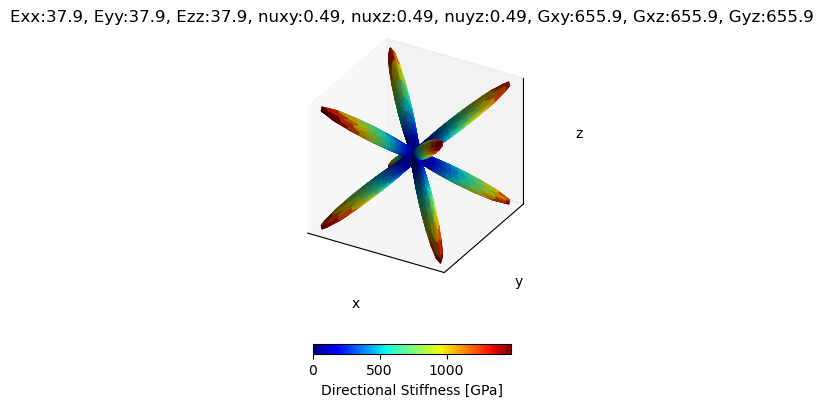

In [30]:
from matplotlib import pyplot as plt

shp = (thetavalues.size,phivalues.size)
X = np.reshape(data[:,0], shp, order='F')
Y = np.reshape(data[:,1], shp, order='F')
Z = np.reshape(data[:,2], shp, order='F')

norm = plt.Normalize(vmin=0)
facecolors = plt.cm.jet(norm(np.sqrt(X**2 + Y**2 + Z**2)))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X,Y,Z, facecolors=facecolors, rstride=1, cstride=1)
ax.set_proj_type('ortho')
ax.set_aspect('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_title('Exx:%.1f, Eyy:%.1f, Ezz:%.1f, nuxy:%.2f, nuxz:%.2f, nuyz:%.2f, Gxy:%.1f, Gxz:%.1f, Gyz:%.1f'%
              (Exx, Eyy, Ezz, nuxy, nuxz, nuyz, Gxy, Gxz, Gyz))
m = plt.cm.ScalarMappable(cmap=plt.cm.jet, norm=norm)
m.set_array([])
ax2 = fig.colorbar(m, ax=ax, shrink=0.4, aspect=20, orientation="horizontal")
ax2.set_label('Directional Stiffness [GPa]')

plt.show()